In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
data = pd.read_csv('../Data/custemort_data.csv') #to get data from another folder
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data['Churn'].value_counts() #(30-40 t0 60-70) percentge data then it call imbalanced data 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
data.drop("customerID", axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.isna().value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
False   False          False    False       False   False         False          False            False           False         False             False        False        False            False     False             False          False           False         False    7043
Name: count, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


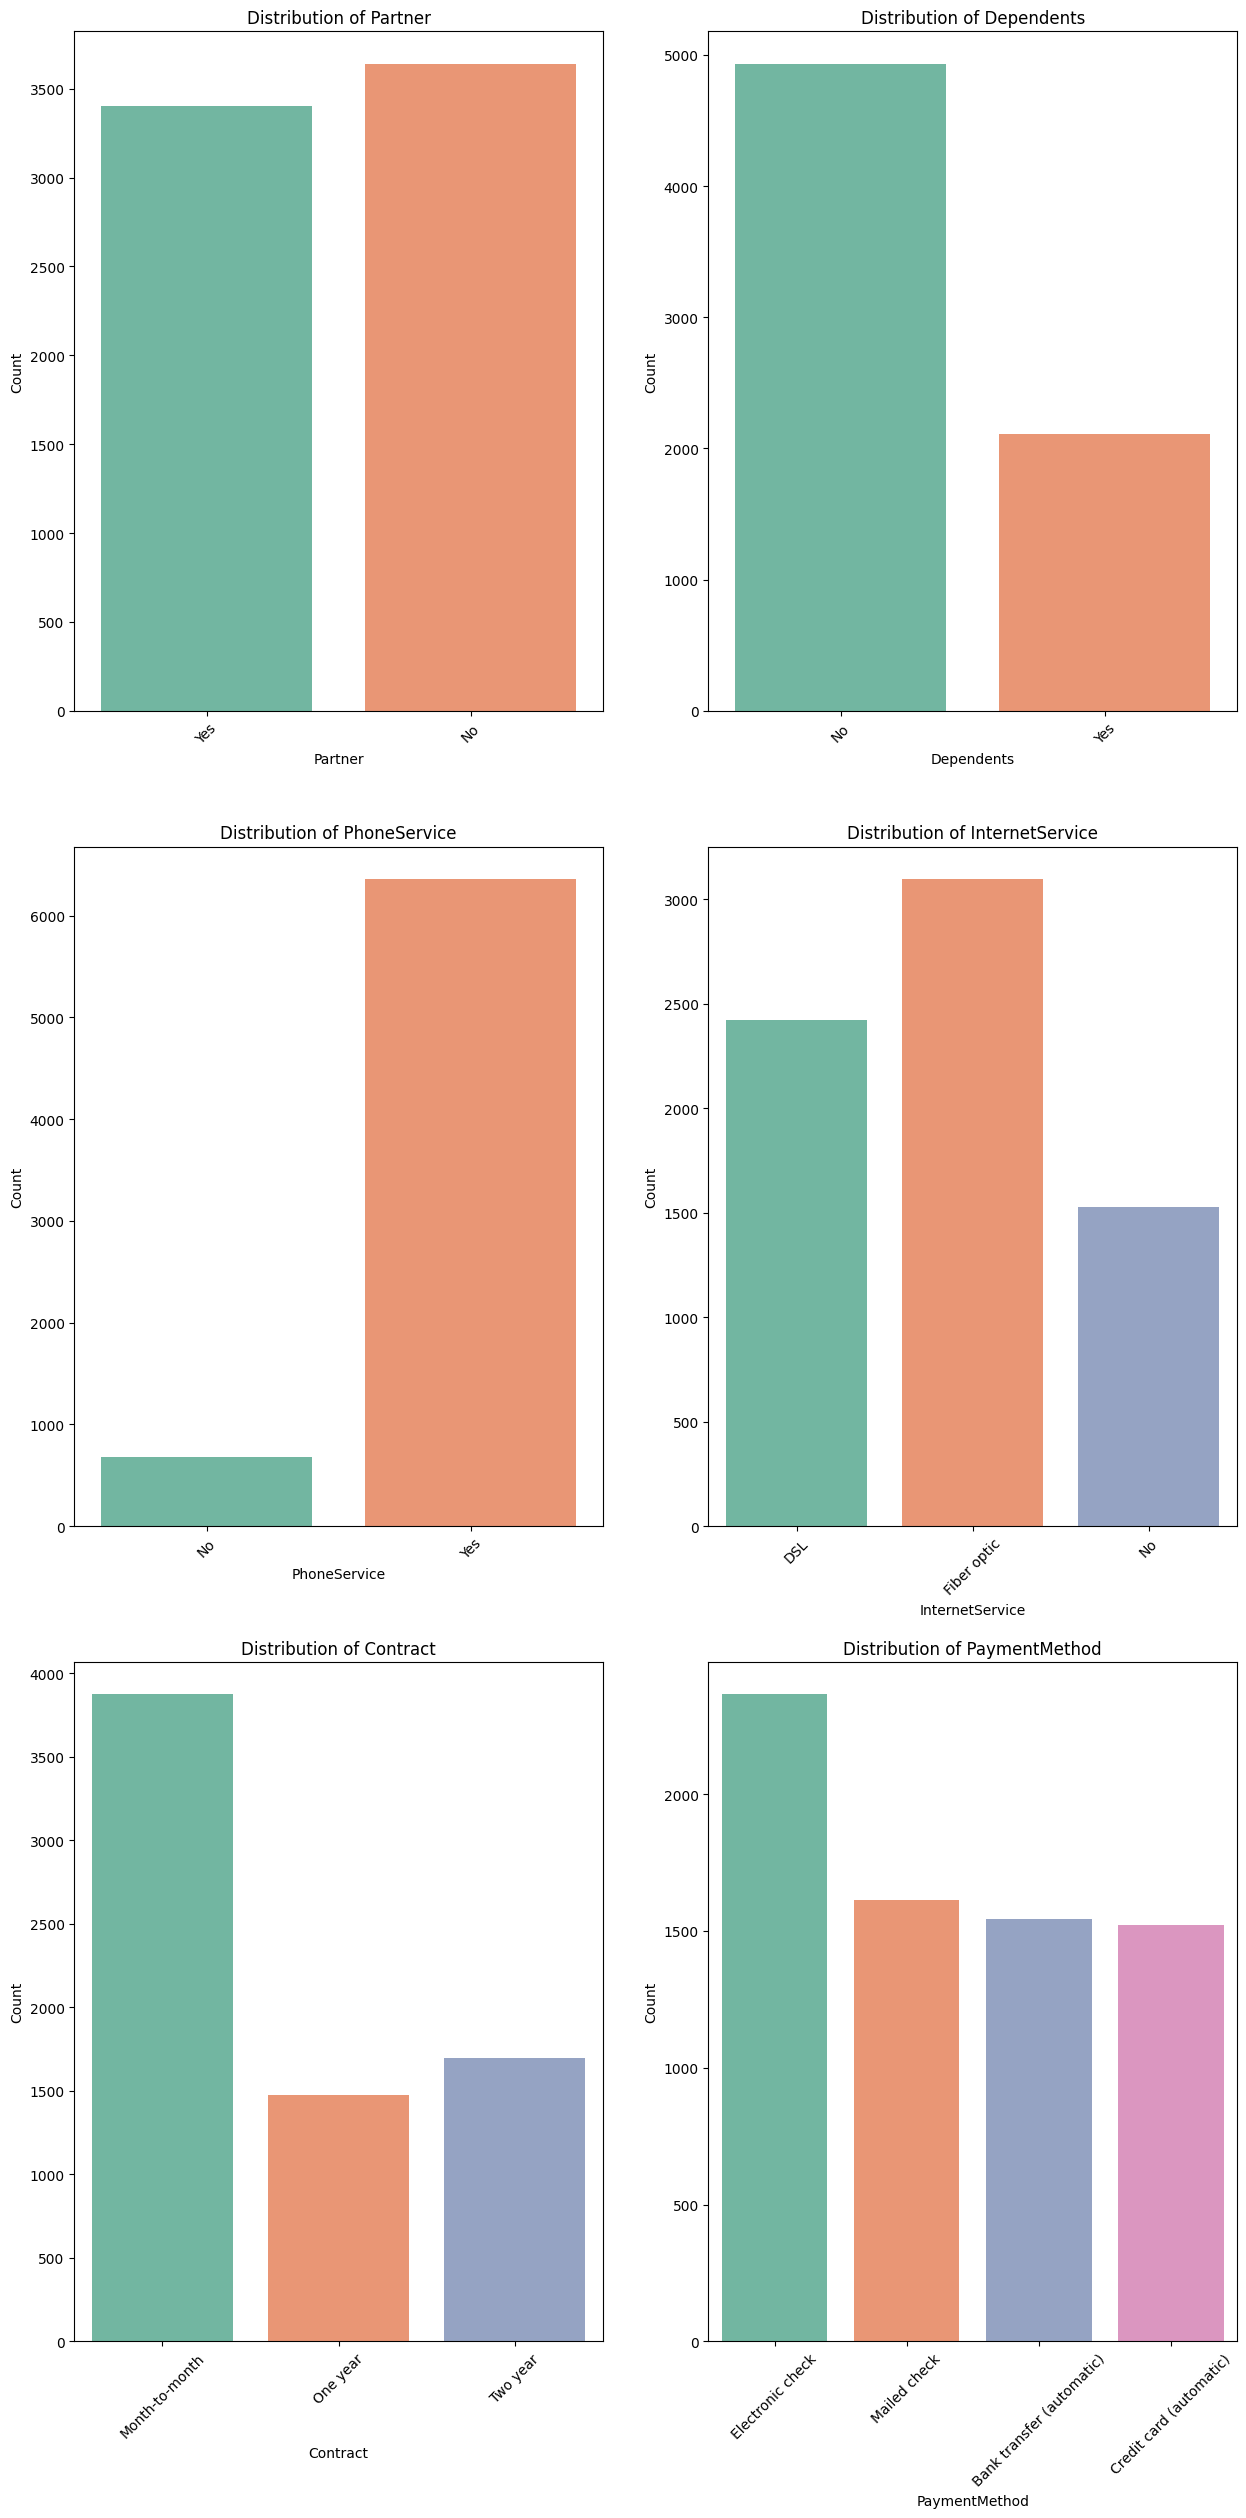

In [10]:

import warnings
warnings.filterwarnings("ignore")

column = ["Partner", "Dependents", "PhoneService", "InternetService", "Contract", "PaymentMethod"]


rows = 3
cols = 2

plt.figure(figsize=(15, 30))

for i, col in enumerate(column, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=data, x=col, palette="Set2")  
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)  
    plt.xlabel(col)
    plt.ylabel("Count")


plt.show()


In [ ]:
#some values in total charges are blank or NA for that we can fill na with 0 
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"].fillna(0, inplace=True)


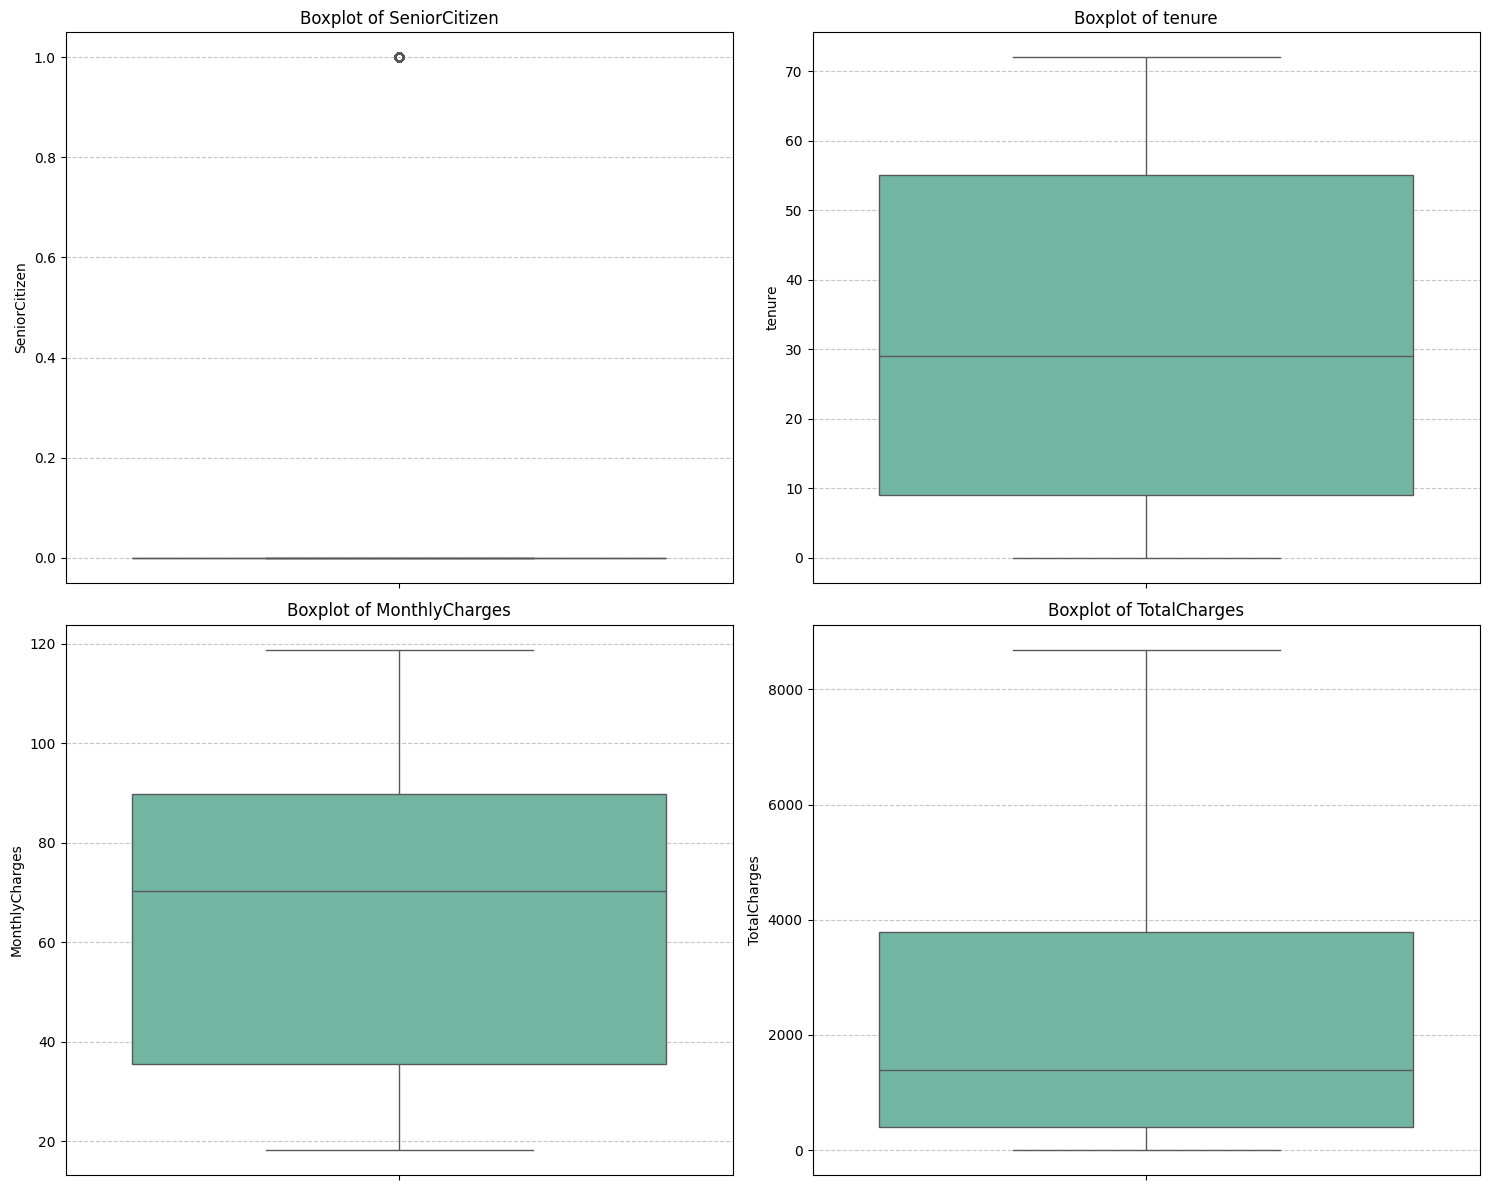

In [26]:

import warnings
warnings.filterwarnings("ignore")


columns = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

rows, cols = 2, 2
plt.figure(figsize=(15, 12))

for i, col in enumerate(columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[col], palette="Set2")  
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [25]:
data["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

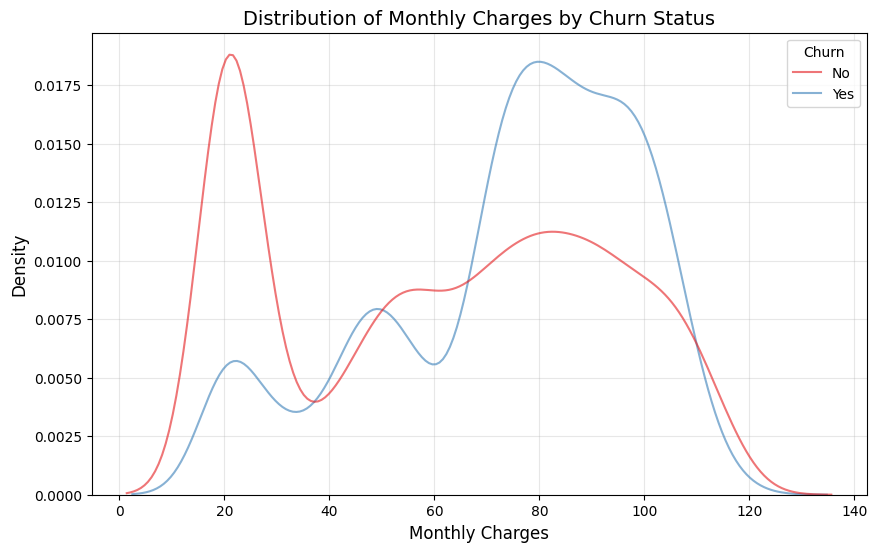

In [29]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn", fill=False, common_norm=False, palette="Set1", alpha=0.6)

plt.title("Distribution of Monthly Charges by Churn Status", fontsize=14)
plt.xlabel("Monthly Charges", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)

plt.show()


In [31]:
columns = ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]
data[columns].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


<Axes: >

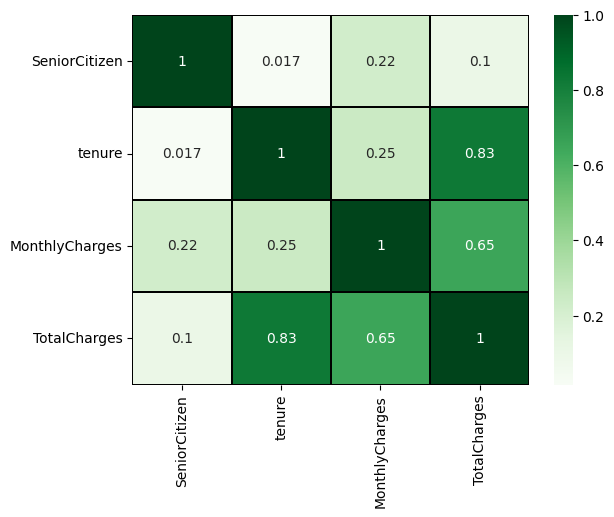

In [37]:
sns.heatmap(data=data[columns].corr(), annot=True, cmap="Greens", linewidths="0.1", linecolor="black")

In [14]:
df = pd.read_csv("../Data/processed.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,Churn
0,-1.277445,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,No
1,0.066327,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,No
2,-1.236724,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,Yes
3,0.514251,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No
4,-1.236724,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,Yes
